In [5]:
import fiftyone as fo 
from fiftyone.core.labels import Detection, Detections 
import os 
import xml.etree.ElementTree as ET 

In [6]:
VAL_IMG_DIR = "../data/images/val" 
VAL_ANN_DIR = "../data/labels/val" 
PRED_DIR = "../runs/detect/run3val" 

In [7]:
class_names = {0: "helmet", 1: "head", 2: "person"} 

In [8]:
name = "test-helmet-v4" 
dataset_dir = "../data" 

# The splits to load 
splits = ["train", "val"] 

# Load dataset 
dataset = fo.Dataset(name=name) 

for split in splits:
    dataset.add_dir(
        dataset_dir=dataset_dir,
        dataset_type=fo.types.YOLOv5Dataset,
        split=split,
        tags=split,
)

 100% |███████████████| 3400/3400 [9.4s elapsed, 0s remaining, 361.3 samples/s]       
 100% |█████████████████| 600/600 [1.6s elapsed, 0s remaining, 380.1 samples/s]         


In [9]:
print(dataset)

Name:        test-helmet-v4
Media type:  image
Num samples: 4000
Persistent:  False
Tags:        []
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    ground_truth:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [10]:
print(dataset.head())

[<Sample: {
    'id': '682272073f776b040512cb63',
    'media_type': 'image',
    'filepath': '/home/cak3isali3/projects/helmet-detection/data/images/train/hard_hat_workers0.png',
    'tags': ['train'],
    'metadata': None,
    'created_at': datetime.datetime(2025, 5, 12, 22, 11, 19, 950000),
    'last_modified_at': datetime.datetime(2025, 5, 12, 22, 11, 19, 950000),
    'ground_truth': <Detections: {
        'detections': [
            <Detection: {
                'id': '682272073f776b040512cb56',
                'attributes': {},
                'tags': [],
                'label': 'helmet',
                'bounding_box': [
                    0.8581731058657169,
                    0.2788461744785309,
                    0.11298077553510666,
                    0.14182692766189575,
                ],
                'mask': None,
                'mask_path': None,
                'confidence': None,
                'index': None,
            }>,
            <Detection: {
         


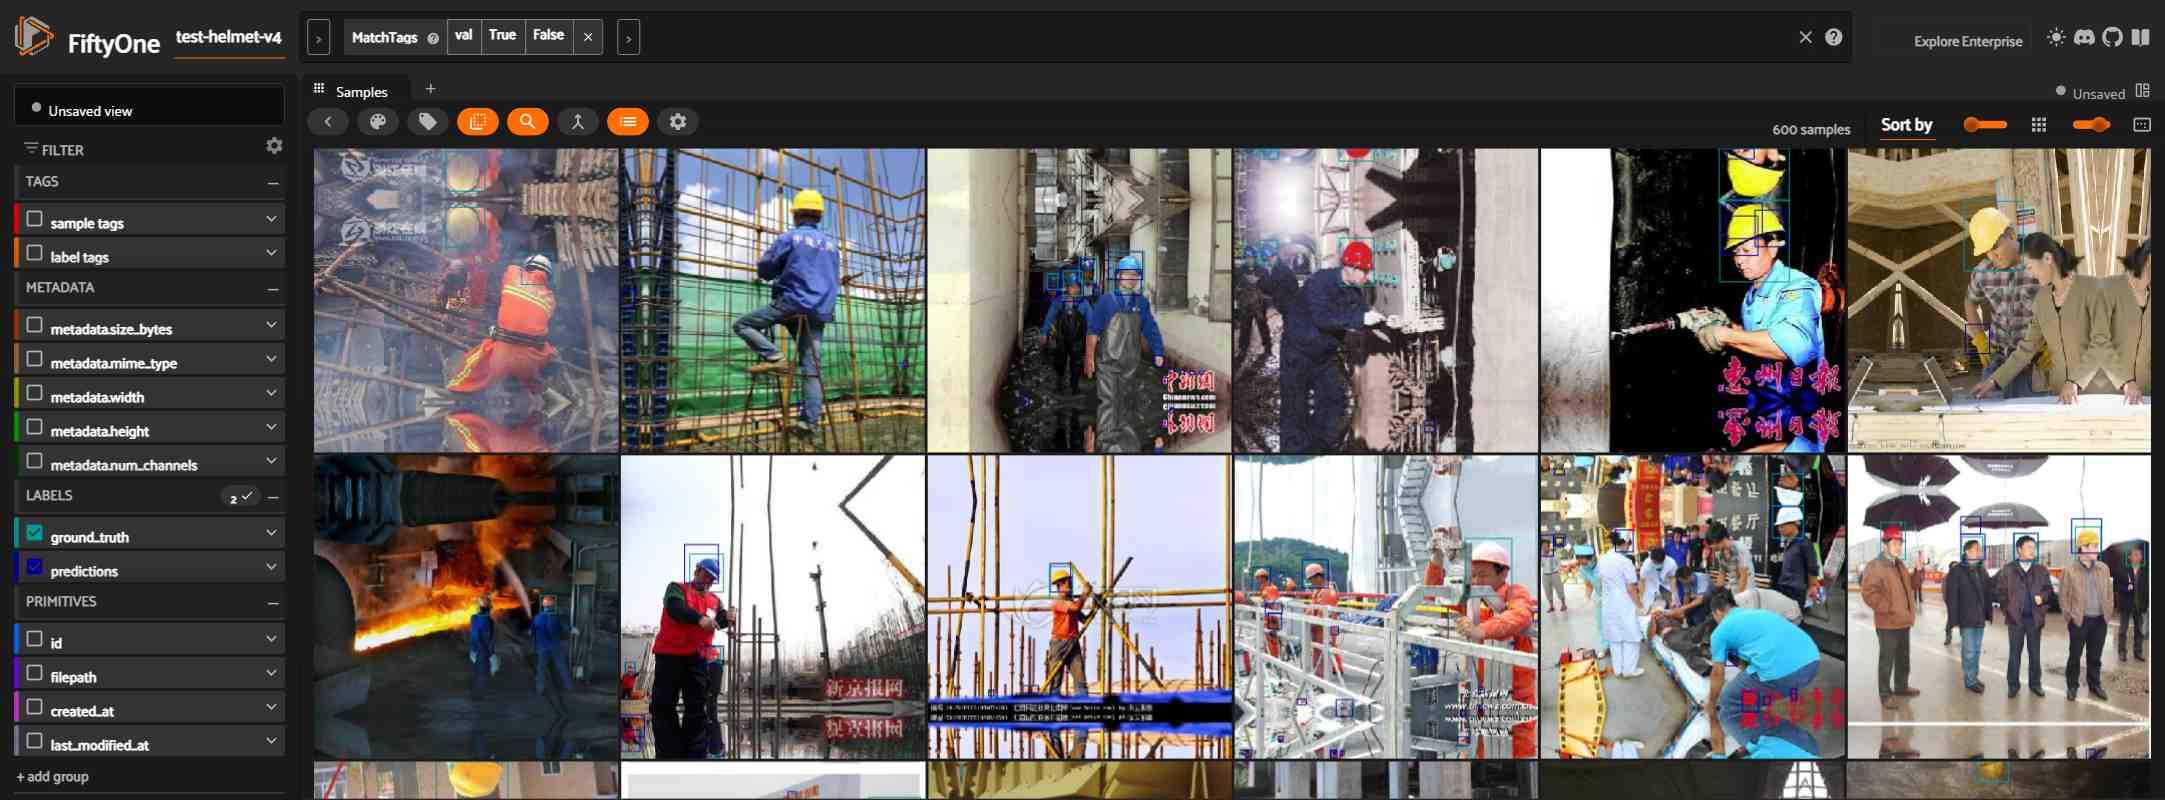

In [11]:
session = fo.launch_app(dataset)


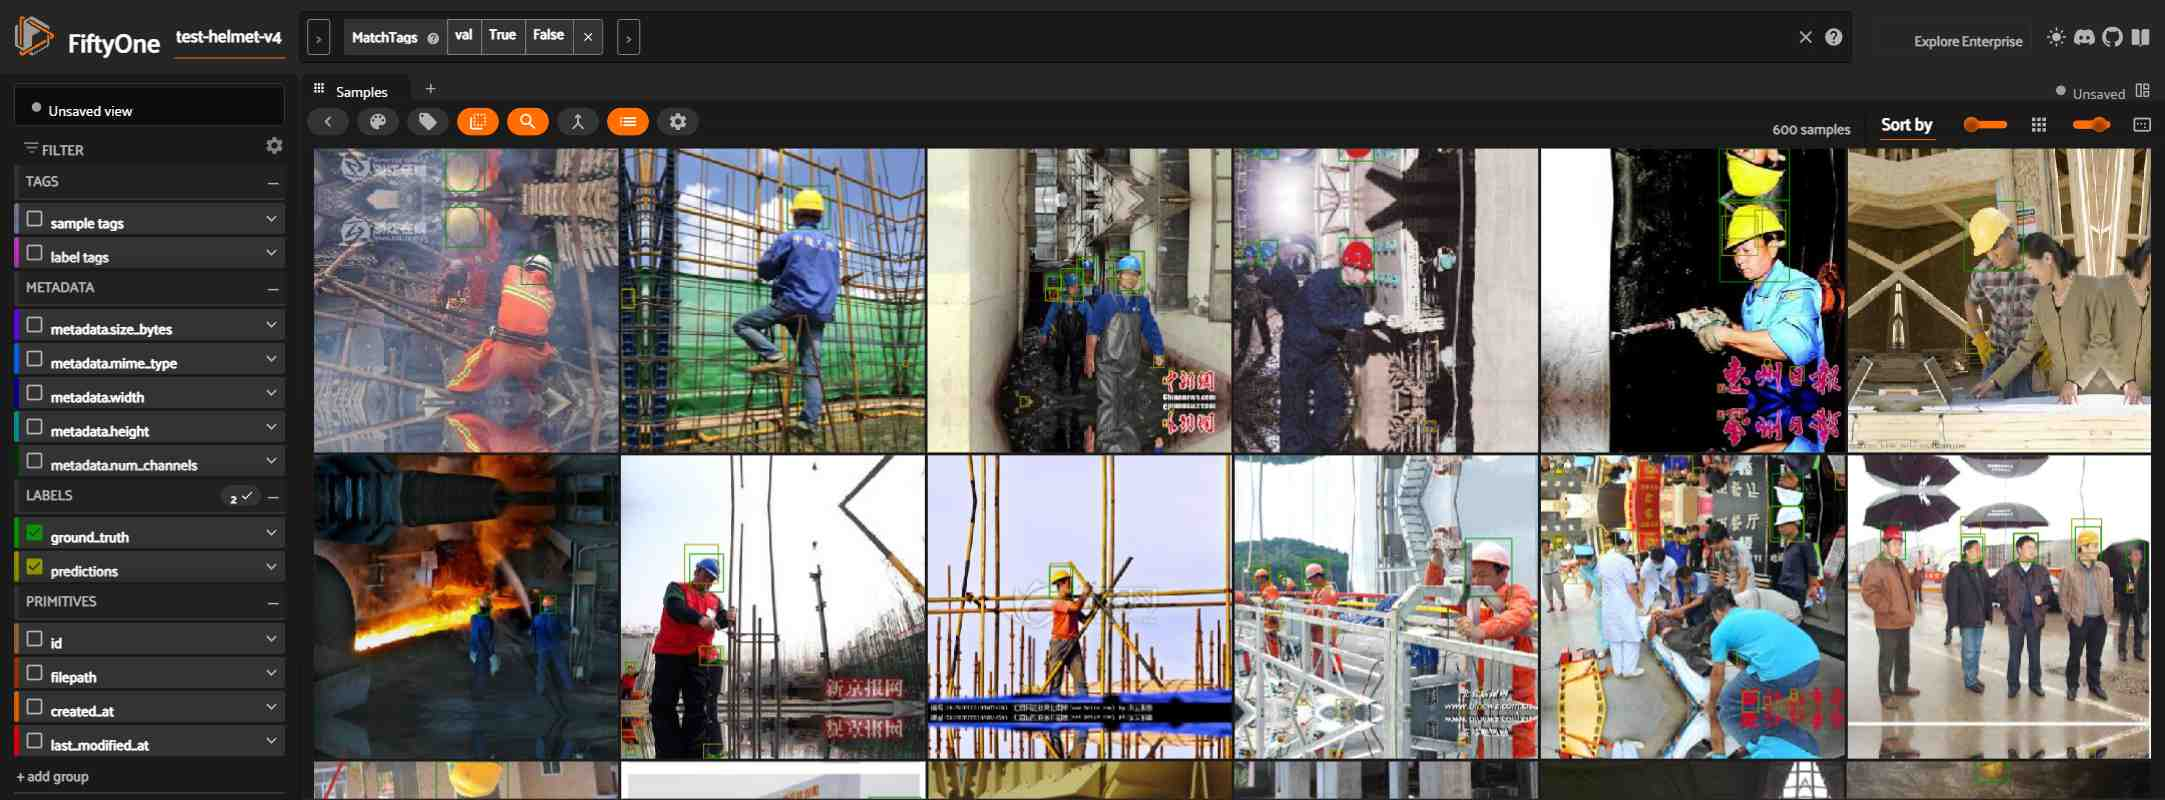

In [12]:
# Show only validation split
val_view = dataset.match_tags("val")
session.view = val_view

In [13]:
import os
from fiftyone.core.labels import Detections, Detection

# Path to prediction .txt files (from detect.py)
pred_label_dir = "../runs/detect/hd_preds/labels"
class_map = {0: "helmet", 1: "head", 2: "person"}

# Add predictions to val split
val_view = dataset.match_tags("val")

for sample in val_view:
    basename = os.path.splitext(os.path.basename(sample.filepath))[0]
    pred_path = os.path.join(pred_label_dir, f"{basename}.txt")
    detections = []

    if os.path.exists(pred_path):
        with open(pred_path) as f:
            for line in f:
                fields = line.strip().split()
                if len(fields) != 6:
                    continue
                cls_id, xc, yc, w, h, conf = map(float, fields)
                label = class_map[int(cls_id)]
                bbox = [xc - w/2, yc - h/2, w, h]
                detections.append(Detection(label=label, bounding_box=bbox, confidence=conf))

    sample["predictions"] = Detections(detections=detections)
    sample.save()

In [14]:
results = val_view.evaluate_detections(
    pred_field="predictions",
    gt_field="ground_truth",
    method="coco",
    classwise=True,
)

Evaluating detections...
 100% |█████████████████| 600/600 [3.9s elapsed, 0s remaining, 175.1 samples/s]      
